In [ ]:
#Question 1

%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

c = np.array([(100,100),(100,125), (225,250),(225,225)])
t1=np.linspace(0, 100, 100).astype('uint8')
print(len(t1))
t2=np.linspace(125,249, 125).astype('uint8')
print(len(t2))
t3=np.linspace(225,255, 31).astype('uint8')
print(len(t3))

transform = np.concatenate((t1,t2,t3), axis=0).astype('uint8')
print(len(transform))

fig, ax = plt.subplots()
plt.plot(transform)


ax.set_xlabel('Input Intensity')
ax.set_ylabel('Output Intensity')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')
plt.savefig('transform.png')
plt.show()

img_orig = cv.imread('natasha_grayscale.jpg', cv.IMREAD_GRAYSCALE)
assert img_orig is not None

image_transformed = cv.LUT(img_orig, transform)


fig, ax = plt.subplots( 1,2, figsize= (12,24))
ax[0].imshow(img_orig, cmap='gray')
ax[1].imshow(image_transformed, cmap = 'gray')
plt.show()

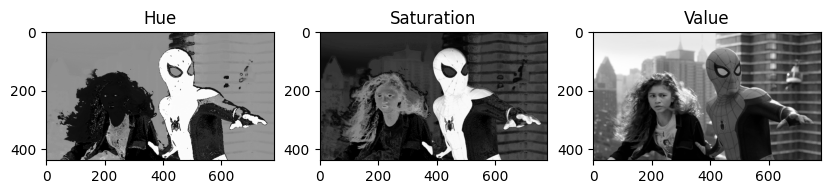

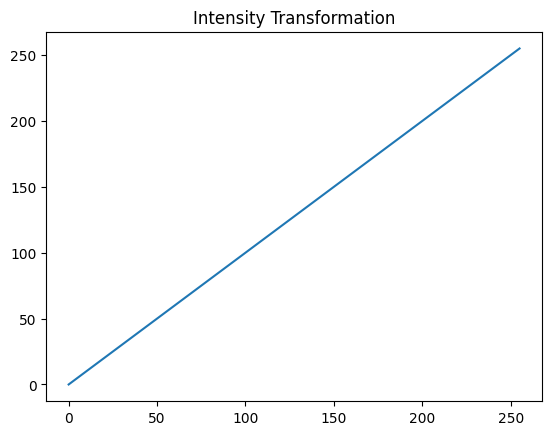

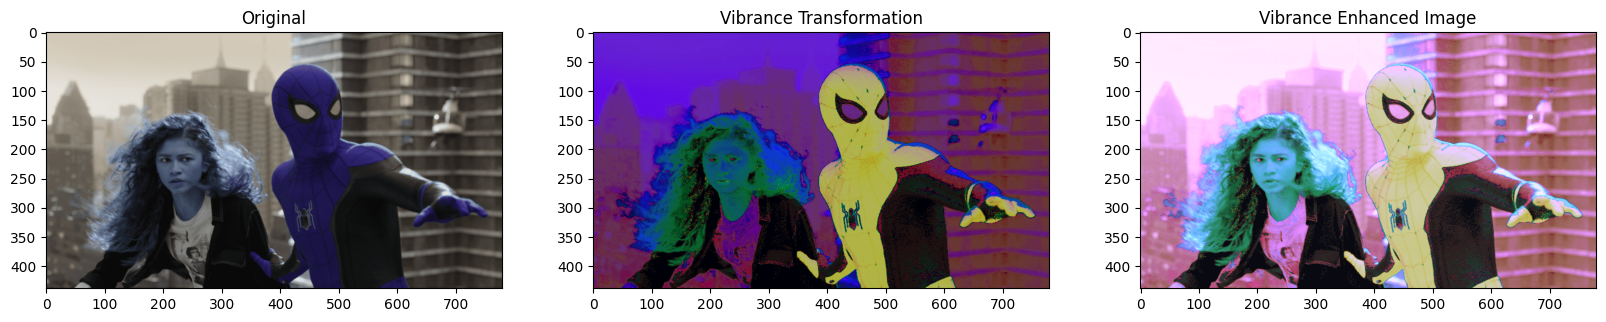

In [31]:
#Question 2

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

im = cv.imread('spider.png', cv.IMREAD_COLOR)
assert im is not None

im1 = cv.cvtColor(im, cv.COLOR_BGR2HSV)
h_img,s_img,v_img = cv.split(im1)

fig, ax= plt.subplots(1,3, figsize=(10,20))
ax[0].imshow(h_img, cmap="gray")
ax[0].set_title('Hue')
ax[1].imshow(s_img, cmap="gray")
ax[1].set_title('Saturation')
ax[2].imshow(v_img, cmap="gray")
ax[2].set_title('Value')
plt.show()

x= np.arange(0, 256).astype('uint8')
a = .1
sigma = 70
x = np.minimum(((x)+(a*(np.exp(-(x-128)**2/(2*sigma**2))))/128), 255).astype('uint8')
image_transform = cv.LUT(s_img, x)
plt.title('Intensity Transformation')
plt.plot(x)
plt.show()

newHSV = cv.merge([h_img,image_transform,v_img])
result =  cv.cvtColor(newHSV,  cv.COLOR_HSV2BGR)
added_img = cv.add(newHSV, im)

fig, ax= plt.subplots(1,3, figsize=(20,10))
ax[0].imshow(im, cmap="gray")
ax[0].set_title('Original')
ax[1].imshow(newHSV, cmap="gray")
ax[1].set_title('Vibrance Transformation')
ax[2].imshow(added_img, cmap="gray")
ax[2].set_title('Vibrance Enhanced Image')
plt.show()

In [ ]:
#Question 3

import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

im = cv.imread ('highlights_and_shadows.jpg', cv.IMREAD_COLOR)
assert im is not None

im_LAB = cv.cvtColor(im, cv.COLOR_BGR2LAB) 
L_im, q_im , r_im = cv.split(im_LAB)

gamma = .7
t = np.array([(i/255.)**gamma*255 for i in range (256)], np.uint8)
g = t[L_im]
plt.suptitle("Gamma correction Curve")
plt.plot(t)
plt.show()


fig, ax = plt.subplots(1,2, figsize=(10,3.5))
fig.suptitle("Applying gamma correction")
ax[0].imshow(L_im, cmap="gray")
ax[0].set_title("Original")
ax[1].imshow(g,cmap="gray")
ax[1].set_title("Gamma Corrected")
plt.show()

plt.figure(figsize = [10, 5])
plt.subplot(1, 2, 1)
plt.gca().set_title('Original Histogram')
im_h = cv.calcHist([L_im],[0],None,[256],[0,256])
plt.plot(im_h)

plt.subplot(1, 2, 2)
plt.gca().set_title('Gamma Corrected Histogram')
g_h = cv.calcHist([g],[0],None,[256],[0,256])
plt.plot(g_h)
plt.show()

In [ ]:
#Question 4
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

im = cv.imread('washed_out_aerial_image.png', cv.IMREAD_GRAYSCALE)
assert im is not None

plt.figure(figsize = [10, 5])
plt.subplot(1, 2, 1)
plt.gca().set_title('Original Histogram')
h = np.zeros(256)
h = [np.sum(im==i) for i in range (256)]
plt.bar(range(256), h)

plt.subplot(1, 2, 2)
plt.gca().set_title('Equalized Histogram')
eh = cv.equalizeHist(im)
plt.hist(eh)
plt.show()

fig, ax= plt.subplots(1,2, figsize=(10,20))
ax[0].imshow(im, cmap="gray")
ax[0].set_title('Original')
ax[1].imshow(eh, cmap="gray")
ax[1].set_title('Transformed')
plt.show()

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

im = cv.imread('jeniffer.jpg', cv.IMREAD_COLOR)
assert im is not None

im1 = cv.cvtColor(im, cv.COLOR_BGR2HSV)
h_img,s_img,v_img = cv.split(im1)

fig, ax= plt.subplots(1,3, figsize=(10,2.5))
fig.suptitle("Splitting into HSV regions", fontsize=12)
ax[0].imshow(h_img, cmap="gray")
ax[0].set_title('Hue')
ax[1].imshow(s_img, cmap="gray")
ax[1].set_title('Saturation')
ax[2].imshow(v_img, cmap="gray")
ax[2].set_title('Value')
plt.show()

thresh = cv.inRange(s_img, 15, 230)
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (20,20))
mor = cv.morphologyEx(thresh, cv.MORPH_CLOSE, kernel)
mask = mor
result = cv.bitwise_and(im, im, mask=mask)

fig, ax = plt.subplots(1,3, figsize=(10,2.5))
fig.suptitle("Extracting Foreground Mask")
ax[0].imshow(im, cmap="gray")
ax[0].set_title("Original")
ax[1].imshow(mask, cmap="gray")
ax[1].set_title("Foreground Mask")
ax[2].imshow(result, cmap="gray")
ax[2].set_title("Foreground Image")
plt.show()

plt.figure(figsize = [10, 2.5])
plt.subplot(1, 2, 1)
plt.gca().set_title('Original Histogram of Foreground')
fg_h = cv.calcHist([result],[0],None,[256],[0,256]) 
plt.plot(fg_h)

plt.subplot(1, 2, 2)
plt.gca().set_title('Corrected Histogram')
FINALresult = cv.cvtColor(result, cv.COLOR_BGR2GRAY)
e = cv.equalizeHist(FINALresult) 
e1 = cv.calcHist([e], [0], None, [256], [0,256])
plt.plot(e1)
plt.show()

cumulative_sum = np.cumsum(e) 
plt.plot(cumulative_sum)
plt.title("Cumulative Sum")
plt.show()


mask1 = 255 - mor
bg_img = cv.bitwise_and(im, im, mask=mask1)
bg_img1 = cv.cvtColor(bg_img, cv.COLOR_BGR2GRAY);

img1 = cv.add(bg_img1,eh)

fig, ax = plt.subplots(1,3, figsize=(10,2.5))
fig.suptitle("Adding background with equalized")
ax[0].imshow(bg_img, cmap="gray")
ax[0].set_title("Background Image")
ax[1].imshow(eh, cmap="gray")
ax[1].set_title("Foreground Image")
ax[2].imshow(img1, cmap="gray")
ax[2].set_title("Added Image")
plt.show()